In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
walmart = pd.read_csv(r'C:\Users\NIKITHA\Downloads\Walmart (1) (1).csv')

In [3]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart.shape

(6435, 8)

In [5]:
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
walmart.duplicated().sum()

0

In [10]:
#Changing the data datatype to datetime type
from datetime import datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


Exploratory Data Analysis(EDA)

In [13]:
walmart['Year']=walmart['Date'].dt.year
walmart['Month']=walmart['Date'].dt.month
walmart['Day']=walmart['Date'].dt.day
walmart['MonthYear_value']=walmart['Date'].dt.to_period('M')

In [14]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


In [15]:
walmart.shape

(6435, 12)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

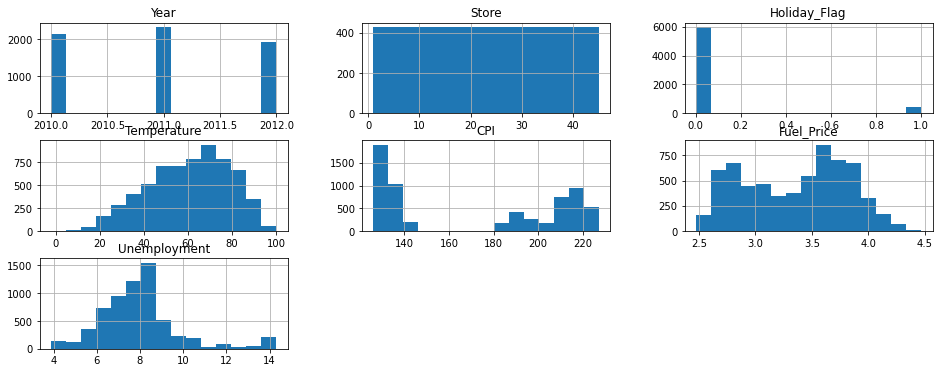

In [16]:
walmart[['Year','Store','Holiday_Flag','Temperature','CPI','Fuel_Price','Unemployment' ]].hist(bins=15, figsize=(16,6))

array([<AxesSubplot:xlabel='MonthYear_value'>], dtype=object)

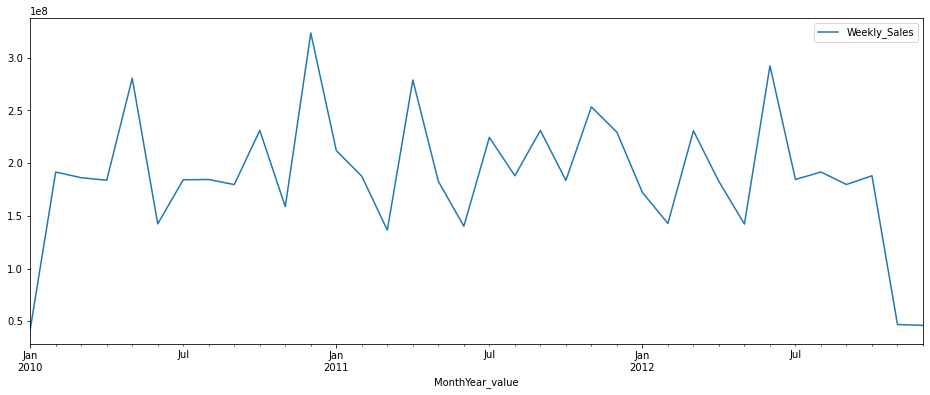

In [17]:
yearly_sales = walmart.groupby(['MonthYear_value']).sum()
yearly_sales[['Weekly_Sales']].plot(figsize=(16,6),subplots=True)

Text(0.5, 1.0, 'Monthwise Sales')

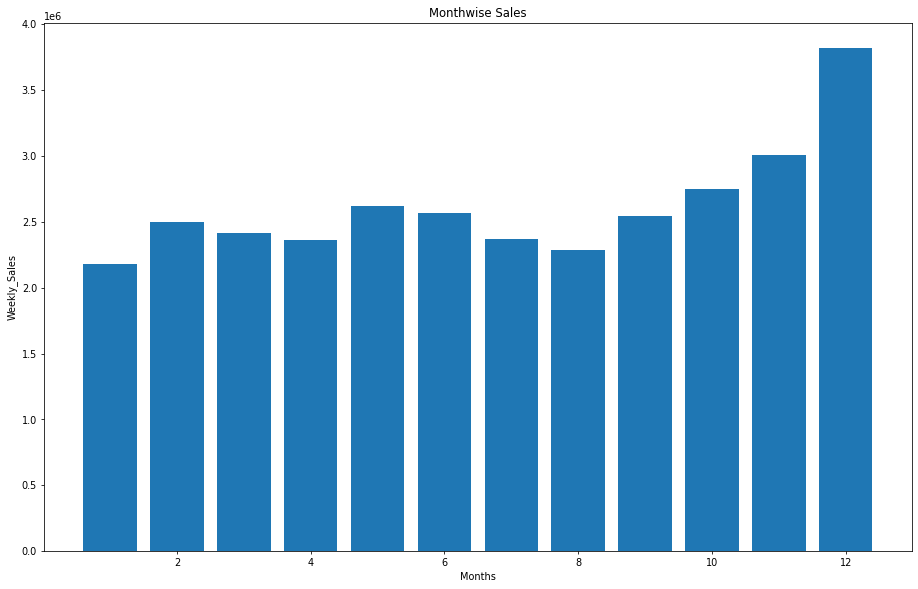

In [18]:
#Monthly Sales
walmart['Day'] = pd.DatetimeIndex(walmart['Date']).day
walmart['Month'] = pd.DatetimeIndex(walmart['Date']).month
walmart['Year'] = pd.DatetimeIndex(walmart['Date']).year

plt.figure(figsize=(16,10), dpi = 70)
plt.bar(walmart['Month'],walmart['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 960x720 with 0 Axes>

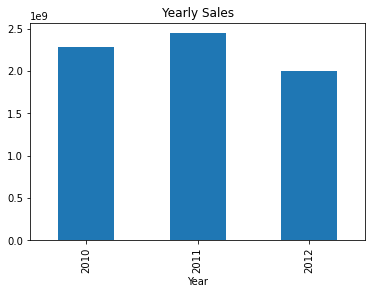

In [19]:
#Yearly Sales
plt.figure(figsize=(12,9), dpi = 80)
walmart.groupby('Year')[['Weekly_Sales']].sum().plot(kind = 'bar',legend=False)
plt.title('Yearly Sales')

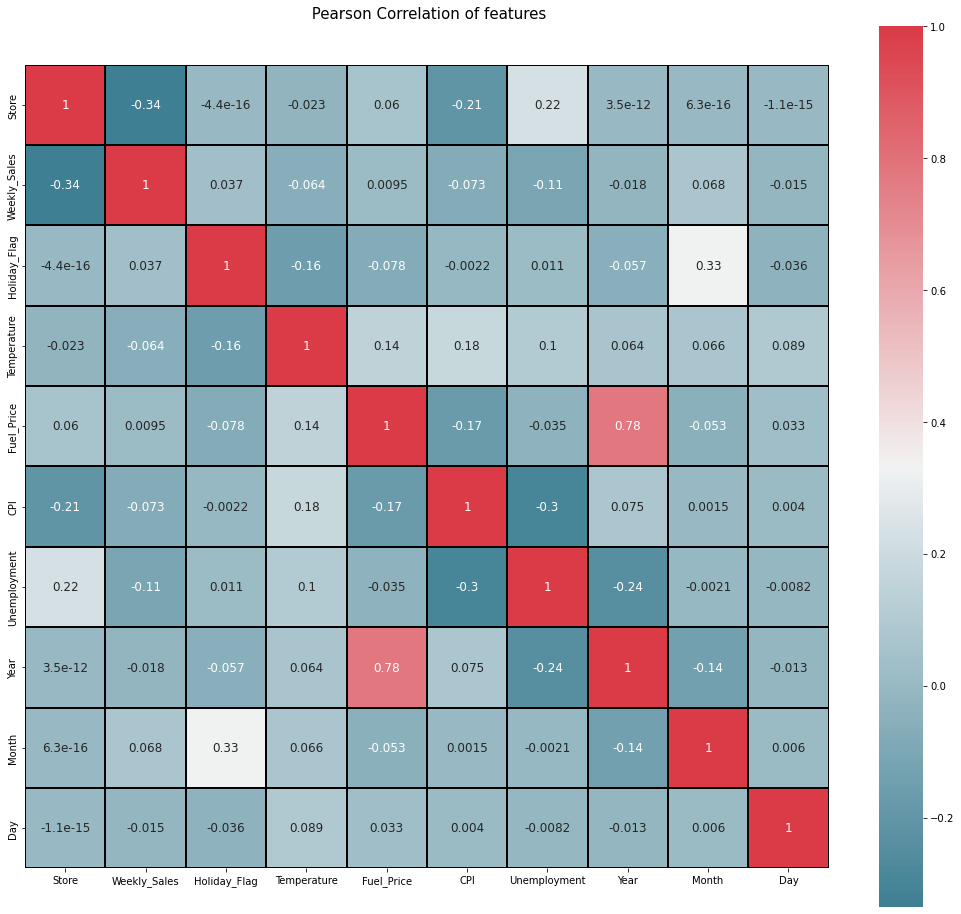

In [20]:
#Correlation heatmap
def correlation_heatmap(walmart_sales):
    _ , ax = plt.subplots(figsize = (18,18))
    colormap = sns.diverging_palette(220 , 10 , as_cmap = True)
    
    _  = sns.heatmap(
        walmart.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink' : 0.9},
        ax = ax,
        annot = True, 
        linewidths = 0.1 , vmax = 1.0 , linecolor = 'black',
        annot_kws = {'fontsize' : 12}
    )
    
    plt.title(' Pearson Correlation of features' , y = 1.05 , size = 15) 
    
correlation_heatmap(walmart)

In [21]:
#Unemployment Increases sales decreases
print("The correlation coeffiecient between weekly_sales and Holiday_Flag is: ",
np.corrcoef(walmart['Weekly_Sales'],walmart['Unemployment'])[0,1])

The correlation coeffiecient between weekly_sales and Holiday_Flag is:  -0.10617608965795419


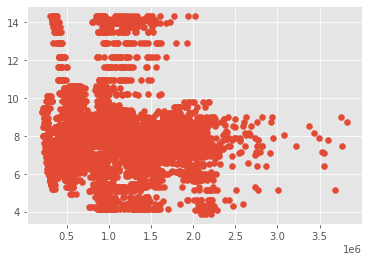

In [22]:
plt.style.use('ggplot')
plt.scatter(walmart['Weekly_Sales'],walmart['Unemployment'])
plt.show()

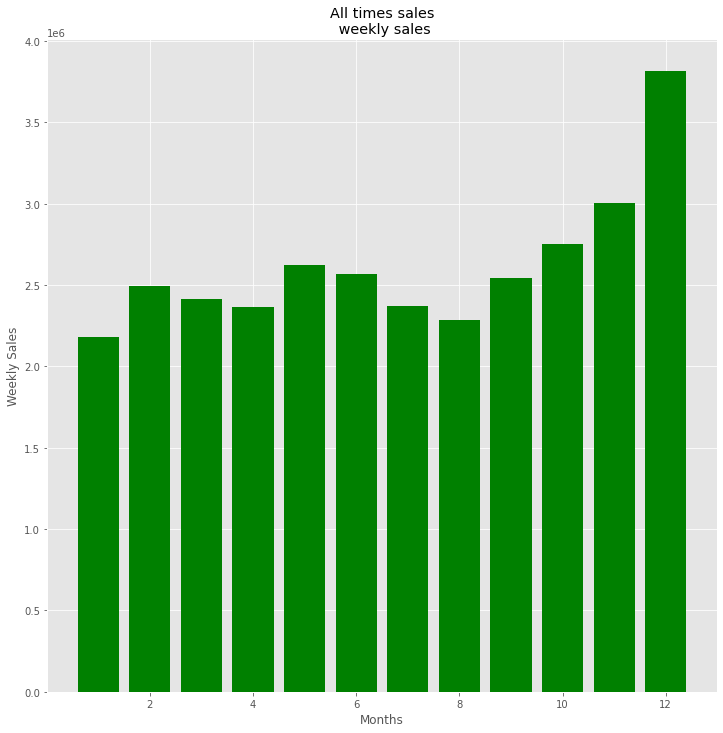

In [23]:
#Highest sales season is in December
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 12))
# Add x-axis and y-axis
ax.bar(walmart['Month'],
        walmart['Weekly_Sales'],
        color='green')

ax.set(xlabel="Months",
       ylabel="Weekly Sales",
       title="All times sales\n weekly sales")

plt.show()

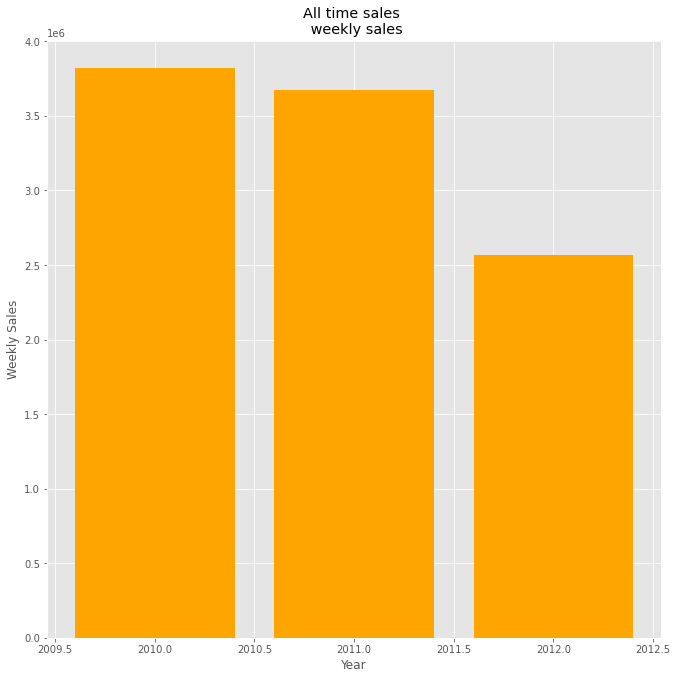

In [24]:
#Decrease in sale overtime
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 11))

ax.bar(walmart['Year'],
       walmart['Weekly_Sales'],
       color='orange')

ax.set(xlabel="Year",
       ylabel="Weekly Sales",
       title="All time sales \n weekly sales")

plt.show()

array([<AxesSubplot:xlabel='MonthYear_value'>], dtype=object)

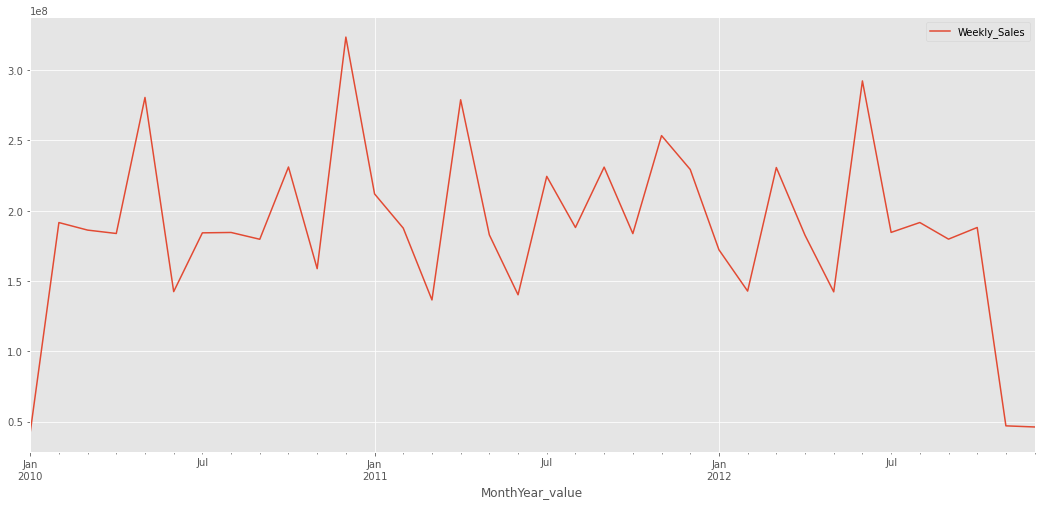

In [25]:
#Comparing the Sales over the years.
#Real Decline since Oct 2012
sales_year = walmart.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(figsize=(18, 8),subplots=True)

In [26]:
walmart['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [27]:
sales_2010 = pd.DataFrame(walmart[walmart['Year']==2010])
sales_2011 = pd.DataFrame(walmart[walmart['Year']==2011])
sales_2012 = pd.DataFrame(walmart[walmart['Year']==2012])

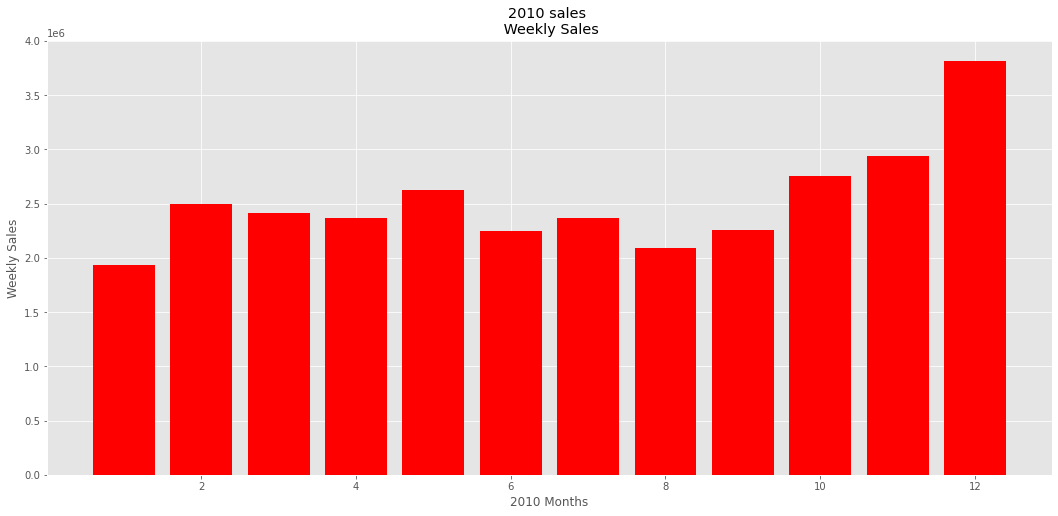

In [28]:
#Sales 2010
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,8))

#Add x axis and y axis
ax.bar(sales_2010['Month'],
       sales_2010['Weekly_Sales'],
        color = 'red')
#Set title and labels for axes
ax.set(xlabel = "2010 Months",
       ylabel = "Weekly Sales",
       title = "2010 sales \n Weekly Sales")

plt.show()

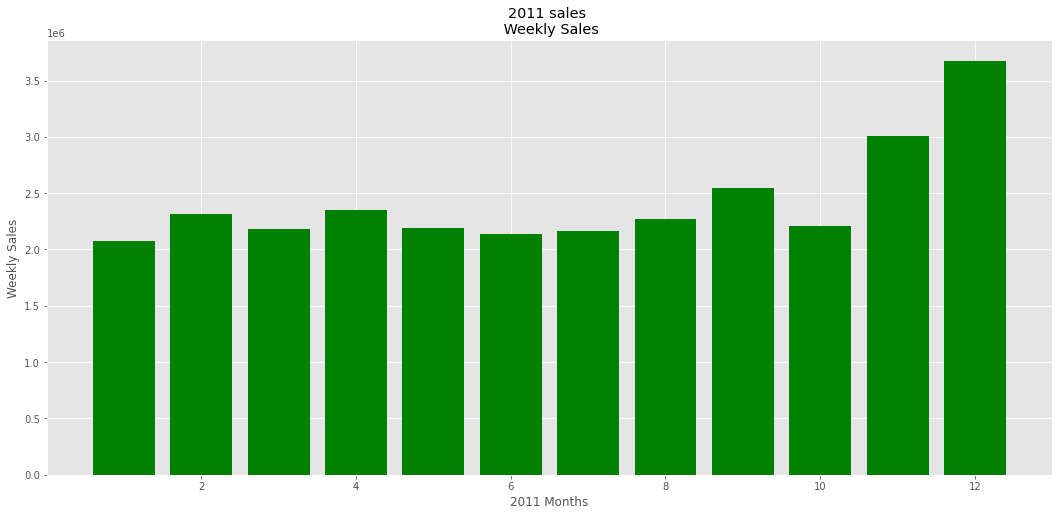

In [29]:
#Sales 2011
plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(18,8))
#Add x axis and y axis
ax1.bar(sales_2011['Month'],
        sales_2011['Weekly_Sales'],
        color='green')
#Set title and labels for axes
ax1.set(xlabel = "2011 Months",
       ylabel = "Weekly Sales",
       title = "2011 sales \n Weekly Sales")

plt.show()

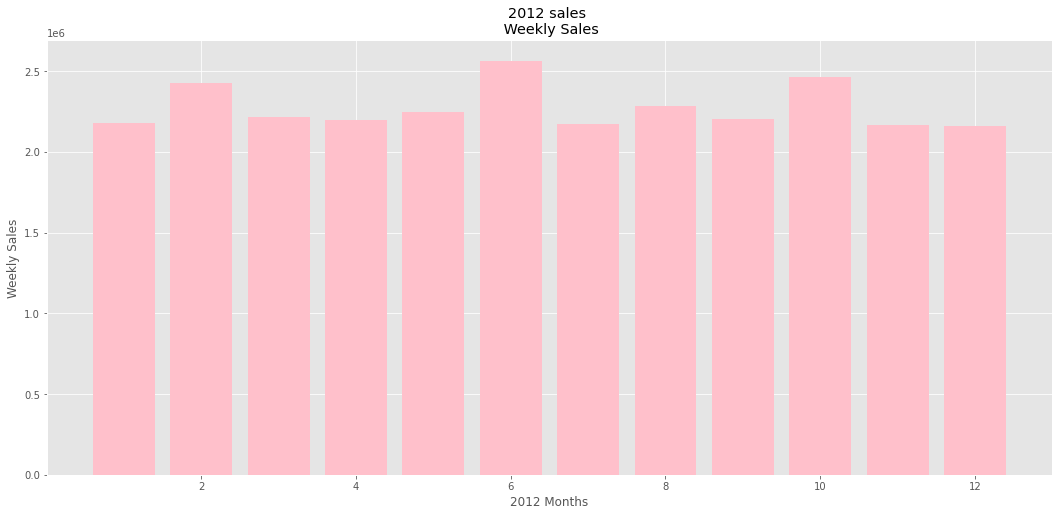

In [30]:
#Sales 2012
plt.style.use('ggplot')
fig2, ax2 = plt.subplots(figsize=(18,8))
#Add x axis and y axis
ax2.bar(sales_2012['Month'],
        sales_2012['Weekly_Sales'],
        color='pink')
#Set title and labels for axes
ax2.set(xlabel = "2012 Months",
       ylabel = "Weekly Sales",
       title = "2012 sales \n Weekly Sales")

plt.show()

2010 and 2011 look similat as Q4 has the peak in sales, but 2012 has at Feb,June and Oct

In [31]:
#Top 5 weekly sales stores
walmart = walmart.groupby(walmart['Store']).aggregate({'Weekly_Sales':'std'}).sort_values(by = 'Weekly_Sales',ascending = False)
walmart.reset_index(drop=True)
print("\n The Top 5 stores forthe weekly sales \n")
walmart.head(5)


 The Top 5 stores forthe weekly sales 



,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776


In [32]:
walmart = pd.read_csv(r'C:\Users\NIKITHA\Downloads\Walmart (1) (1).csv')

Basic Analysis Tasks

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

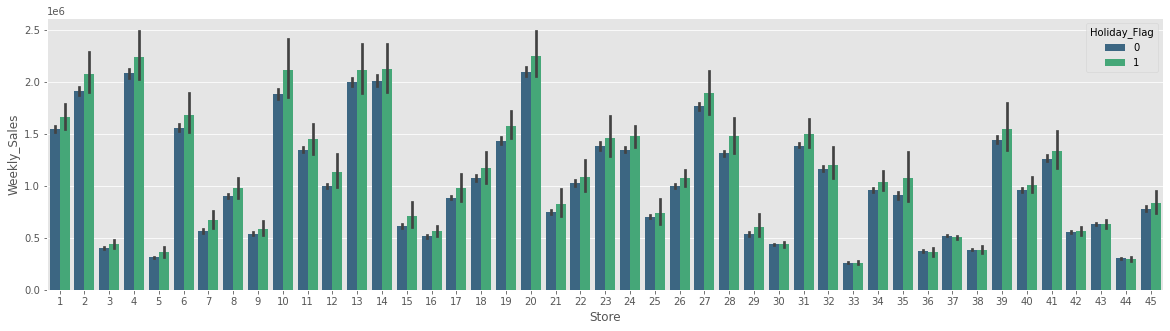

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=walmart, x="Store", y="Weekly_Sales", hue="Holiday_Flag", ax=ax, palette = "viridis")

Store with Maximum Weekly Sales

In [34]:
walmart_store_sales = walmart.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))

In [35]:
walmart_store_sales[(walmart_store_sales['Sum_of_Weekly_Sales'] == max(walmart_store_sales['Sum_of_Weekly_Sales']))]

,Store,Sum_of_Weekly_Sales
19,20,3.013978e+08


<AxesSubplot:xlabel='Store', ylabel='Sum_of_Weekly_Sales'>

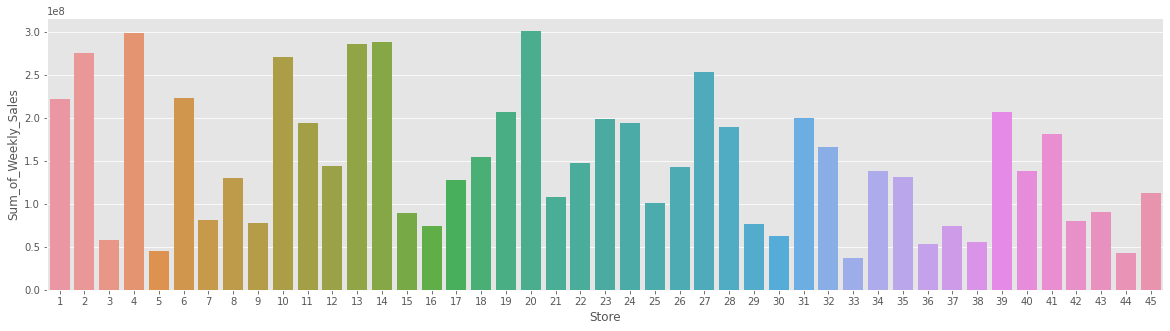

In [36]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=walmart_store_sales, x="Store", y="Sum_of_Weekly_Sales", ax=ax)

The weekly sales varies a lot in Store 14

In [39]:
walmart_stats = walmart.groupby('Store', as_index=False).agg(Sales_sum=('Weekly_Sales','sum'), 
                                        Mean_Sales=('Weekly_Sales','mean'), 
                                        Std_Sales=('Weekly_Sales', 'std'),
                                        Sales_Variance=('Weekly_Sales','var'))
walmart_stats

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10


In [40]:
walmart_stats['Coeff_of_Variation'] = (walmart_stats['Std_Sales'] / walmart_stats['Mean_Sales'])*100
walmart_stats

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance,Coeff_of_Variation
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10,10.029212
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10,12.342388
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09,11.502141
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10,12.708254
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09,11.866844
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10,13.582286
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10,19.730469
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10,11.695283
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09,12.689547
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10,15.913349


Store with Quarterly Growth Rate in Q3 2012

In [41]:
walmart['Year'] = pd.to_datetime(walmart['Date'], format = "%d-%m-%Y").dt.year
walmart['Month'] = pd.to_datetime(walmart['Date'], format = "%d-%m-%Y").dt.month

In [42]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >= 7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan
        

In [45]:
walmart['Quarter'] = walmart['Month'].apply(assign_quarter_category)
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Q4


In [47]:
walmart_sales_2012 = walmart[(walmart['Year']==2012)]
walmart_sales_2012.drop(['Month', 'Year'], axis='columns', inplace=True)
walmart_sales_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
100,1,06-01-2012,1550369.92,0,49.01,3.157,219.714258,7.348,Q1
101,1,13-01-2012,1459601.17,0,48.53,3.261,219.892526,7.348,Q1
102,1,20-01-2012,1394393.84,0,54.11,3.268,219.985689,7.348,Q1
103,1,27-01-2012,1319325.59,0,54.26,3.290,220.078852,7.348,Q1
104,1,03-02-2012,1636339.65,0,56.55,3.360,220.172015,7.348,Q1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4


In [48]:
walmart_sales_2012.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,1935.00000,1935,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935
unique,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,06-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,Q1
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,585
mean,23.00000,NaN,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964,NaN
std,12.99053,NaN,5.366535e+05,0.210645,16.944776,0.276605,40.681282,1.699465,NaN
min,1.00000,NaN,2.369205e+05,0.000000,7.460000,3.031000,130.157516,3.879000,NaN
25%,12.00000,NaN,5.585294e+05,0.000000,52.060000,3.545000,136.753000,6.228000,NaN
50%,23.00000,NaN,9.604761e+05,0.000000,65.540000,3.717000,190.461896,7.147000,NaN
75%,34.00000,NaN,1.426383e+06,0.000000,76.575000,3.891000,220.488647,8.253000,NaN


In [49]:
quater_sales = walmart_sales_2012.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
quater_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             20723762.83
      Q2             20978760.12
      Q3             20253947.78
      Q4              6245587.29
2     Q1             24528220.70
...                          ...
44    Q4              1360020.41
45    Q1              9805267.57
      Q2             10390767.83
      Q3              9581268.38
      Q4              2946326.39

[180 rows x 1 columns]

<AxesSubplot:xlabel='Store,Quarter'>

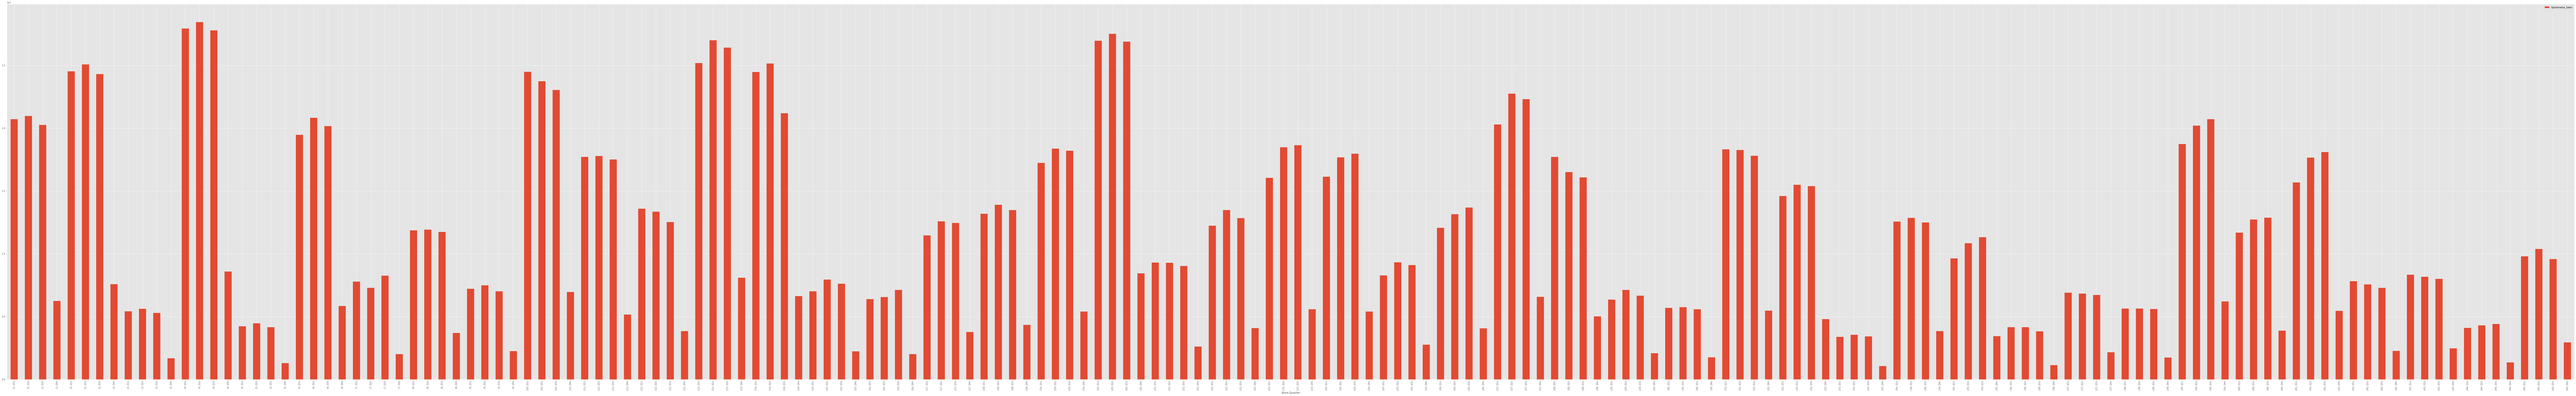

In [51]:
quater_sales.plot(kind = 'bar',grid=True, figsize=(200,30))

In [52]:
quarterly_percentage = quater_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
quarterly_percentage

Quarterwise_Sales
Store Quarter                   
1     Q1               30.385832
      Q2               30.759717
      Q3               29.696975
      Q4                9.157476
2     Q1               30.097197
...                          ...
44    Q4                9.586132
45    Q1               29.963875
      Q2               31.753103
      Q3               29.279357
      Q4                9.003666

[180 rows x 1 columns]

In [53]:
quarterly_percentage.reset_index(inplace=True)
Q3 = quarterly_percentage[(quarterly_percentage['Quarter']) == 'Q3']
Q3

,Store,Quarter,Quarterwise_Sales
2,1,Q3,29.696975
6,2,Q3,29.821276
10,3,Q3,29.393455
14,4,Q3,29.962742
18,5,Q3,29.386961
22,6,Q3,30.411367
26,7,Q3,32.572264
30,8,Q3,29.945906
34,9,Q3,29.290652
38,10,Q3,29.448634


In [54]:
Q3[(Q3['Quarterwise_Sales'] == max(Q3['Quarterwise_Sales']))]

,Store,Quarter,Quarterwise_Sales
26,7,Q3,32.572264


<AxesSubplot:xlabel='Store', ylabel='Quarterwise_Sales'>

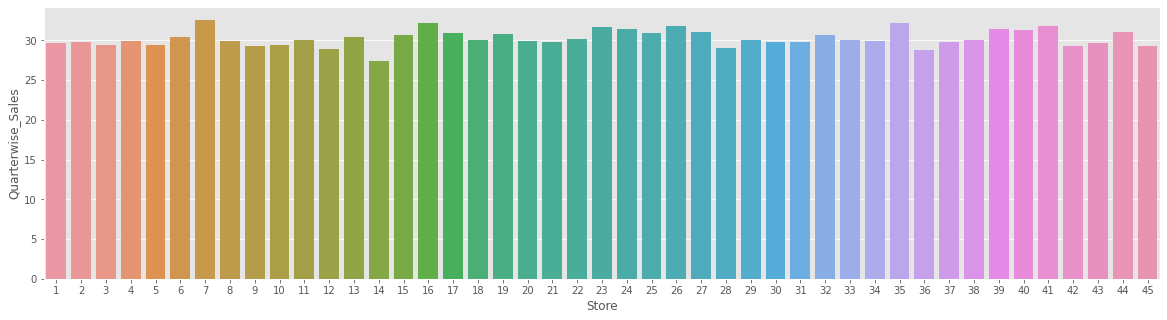

In [55]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=Q3, x="Store", y="Quarterwise_Sales", ax=ax)

Good Quarterly Growth Rate has Store 7 in Q3 2012

Holidays which have a higher sales than the mean sales in non-holiday season for all stores together

In [56]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 

In [57]:
walmart_holiday_analysis = walmart.drop(['Store', 'Year', 'Month'], axis='columns')
walmart_holiday_analysis['Holiday'] = walmart_holiday_analysis['Date'].apply(assign_holiday)
walmart_holiday_analysis

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


In [58]:
walmart_mean = walmart_holiday_analysis.groupby('Holiday').agg(Mean_Weekly_Sales=('Weekly_Sales','mean'))
walmart_mean

,Mean_Weekly_Sales
Holiday,
Christmas,9.608331e+05
Labour Day,1.042427e+06
Non-Holiday,1.041256e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


<AxesSubplot:xlabel='Holiday'>

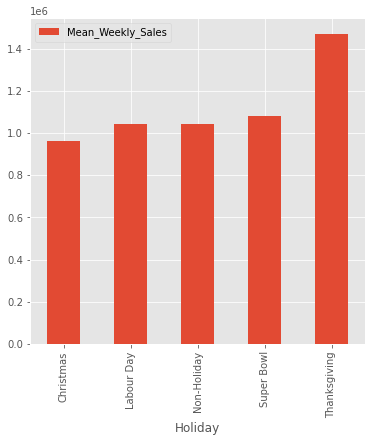

In [59]:
walmart_mean.plot(kind='bar', y='Mean_Weekly_Sales', figsize=(6,6))

In [60]:
walmart_mean.sort_values(by='Mean_Weekly_Sales')

,Mean_Weekly_Sales
Holiday,
Christmas,9.608331e+05
Non-Holiday,1.041256e+06
Labour Day,1.042427e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


Labour Day Week, Super Bowl Week and Thanksgiving Week have a negative impact on Sales

In [62]:
walmart_holiday_analysis

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Quarter'>

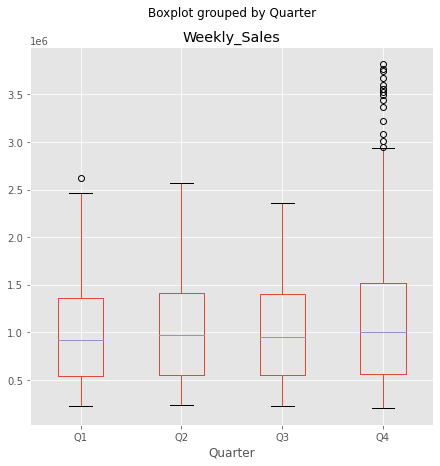

In [63]:
walmart_holiday_analysis.boxplot(by='Quarter', column=['Weekly_Sales'], figsize=(7,7))

In [64]:
walmart_holiday_analysis.groupby('Quarter').agg({'Weekly_Sales':'std'})

,Weekly_Sales
Quarter,
Q1,531586.678340
Q2,543203.300352
Q3,528621.228868
Q4,654298.120425


In [65]:
pd.pivot_table(walmart_holiday_analysis, index=["Quarter",'Holiday'], aggfunc={'Weekly_Sales':np.mean})

Weekly_Sales
Quarter Holiday                   
Q1      Non-Holiday   9.988370e+05
        Super Bowl    1.079128e+06
Q2      Non-Holiday   1.040806e+06
Q3      Labour Day    1.042427e+06
        Non-Holiday   1.021697e+06
Q4      Christmas     9.608331e+05
        Non-Holiday   1.115843e+06
        Thanksgiving  1.471273e+06

In [66]:
pd.pivot_table(walmart_holiday_analysis, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':'sum', 'CPI':np.mean})

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.601725,6.231919e+09
1,171.268092,5.052996e+08


Quarter with Low/Hight Unemployment Rate

In [67]:
quater_Unemployment = walmart.groupby('Quarter', as_index=False).agg(Mean_Unemployment_Rate=('Unemployment','mean'))
quater_Unemployment

,Quarter,Mean_Unemployment_Rate
0,Q1,8.062340
1,Q2,8.022459
2,Q3,7.925542
3,Q4,7.997541


<AxesSubplot:xlabel='Quarter', ylabel='Mean_Unemployment_Rate'>

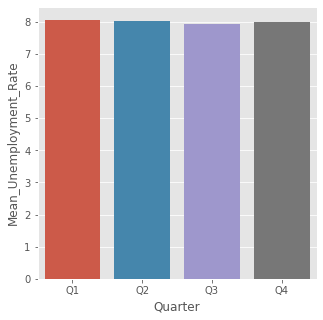

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=quater_Unemployment, x="Quarter", y="Mean_Unemployment_Rate", ax=ax)

In [ ]:
#Conclusion:
#Q1 has a higher Unemployment Rate
#Q3 has a lower unemployment Rate

# Walmart Sales Prediction

In [72]:
#Changing the data datatype to datetime type
from datetime import datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int64
Month                    int64
Quarter                 object
dtype: object

In [73]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1


In [76]:
walmart['Year']=walmart['Date'].dt.year
walmart['Month']=walmart['Date'].dt.month
walmart['Day']=walmart['Date'].dt.day
walmart['MonthYear_value']=walmart['Date'].dt.to_period('M')

In [77]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Q1,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Q1,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Q1,3,2010-05


In [79]:
#Model for Prediction

x = walmart[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = walmart['Weekly_Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Used 3 different algorithms to understand which model to use to predict the weekly sales.

In [81]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [82]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

In [83]:
print('Train Accuracy Score:', lr.score(x_train, y_train).round(2)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(2)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(2))

Train Accuracy Score: 14.000000000000002 %
Test Accuracy Score: 15.0 %
Mean Absolute Error: 436468.63
Mean Squared Error: 278738468089.4
Root Mean Squared Error: 527956.88


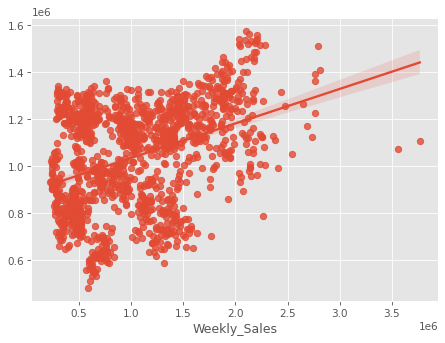

In [85]:
plt.figure(figsize=(7, 5), dpi=75)
sns.regplot(x=y_test, y=lr_y_pred)
plt.show()

In [87]:
# Cross Validation of Linear Regression

lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.1513281  0.13719348 0.10768253 0.14147177 0.17095694 0.15628154
 0.1158388  0.13234401 0.15669024 0.14687443]
Mean Score: 14.166618552877125 %


In [88]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

* Random Forest Regressor *

Accuracy                 = 88.428 %
Mean Absolute Error      = 94251.69781
Mean Squared Error       = 37803491439.98576
Root Mean Squared Error  = 194431.19976


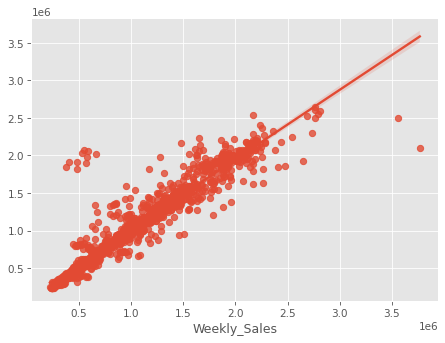

In [89]:
plt.figure(figsize=(7, 5), dpi=75)
sns.regplot(x=y_test, y=rfr_y_pred)

plt.show()

In [91]:
# Cross Validation of Random Forest Regression

rfr_scores = cross_val_score(rfr, x_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.95336918 0.9311742  0.9525292  0.95904973 0.95760239 0.95213468
 0.95123539 0.95043335 0.9611378  0.97028101]
Mean Score: 95.38946909087132 %


In [92]:
#Decission Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

* Decision Tree Regressor *

Accuracy                 = 84.226 %
Mean Absolute Error      = 113254.6602
Mean Squared Error       = 51531164078.23659
Root Mean Squared Error  = 227004.76664


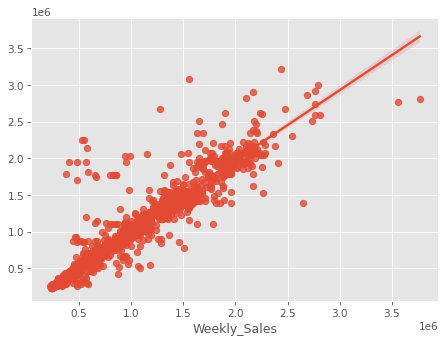

In [93]:
plt.figure(figsize=(7, 5), dpi=75)
sns.regplot(x=y_test, y=dtr_y_pred)

plt.show()

In [94]:
# Cross Validation of Decision Tree

dtr_scores = cross_val_score(dtr, x_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.91999989 0.88687765 0.92400028 0.9485378  0.92825596 0.94637446
 0.92886097 0.91878804 0.95442191 0.95563712]
Mean Score: 93.11754083816854 %
